In [ ]:
from google.colab import files
uploaded=files.upload()

Saving cleaned_dataset.csv to cleaned_dataset (1).csv


In [ ]:
import pandas as pd
import io
df=pd.read_csv('cleaned_dataset.csv')
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,positive,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,negative,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,positive,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,positive,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,neutral,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [ ]:
pip install twython

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
!pip install colorama

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, init
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud


In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd

def null_count(df):
    null_data = df.isnull().sum()
    null_percentage = null_data / len(df)
    return pd.DataFrame({
        'features': df.columns,
        'dtypes': df.dtypes,
        'NaN count': null_data,
        'NaN percentage': null_percentage
    }).style.background_gradient(cmap='Set3', low=0.1, high=0.01)

null_count(df)


,features,dtypes,NaN count,NaN percentage
Text,Text,object,0,0.000000
Sentiment,Sentiment,object,0,0.000000
Cleaned_Text,Cleaned_Text,object,0,0.000000


In [ ]:
df.duplicated().sum()

5

In [ ]:
# prompt: remove duplicated value

df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [ ]:
df.columns

Index(['Text', 'Sentiment', 'Cleaned_Text'], dtype='object')

In [ ]:
def distinct_values_count(df):
    return df.nunique().apply(lambda x: f"{x} distinct values")

# Usage
print(distinct_values_count(df))


Text            707 distinct values
Sentiment       191 distinct values
Cleaned_Text    707 distinct values
dtype: object


In [ ]:
df['Platform'].value_counts()

,count
Platform,
Instagram,252
Facebook,224
Twitter,122
Twitter,114


In [ ]:
df['Platform'] = df['Platform'].str.strip()



In [ ]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,51
UK,49
Canada,44
Australia,36
...,...
Spain,1
Netherlands,1
USA,1


In [ ]:
df['Country'] = df['Country'].str.strip()

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [ ]:
import nltk
nltk.download('punkt_tab')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)

    cleaned_tokens = [stemmer.stem(token) for token in tokens if token.lower() not in stop_words]

    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

df["Clean_Text"] = df["Text"].apply(clean)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df['Month'].value_counts()

,count
Month,
2,85
1,78
8,75
9,74
6,70
7,60
4,49
11,48
10,47


In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize objects
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    """Cleans and preprocesses text by removing special characters, URLs,
    punctuation, stopwords, and applying stemming."""

    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text inside square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = " ".join(text.split())  # Remove extra spaces

    tokens = word_tokenize(text)  # Tokenization
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]  # Remove stopwords & stem

    return ' '.join(cleaned_tokens)  # Join cleaned tokens

# Apply cleaning function to the DataFrame
df["Clean_Text"] = df["Text"].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from colorama import Fore, Style

def display_unique_value_counts(df, columns):
    """Displays the count of unique values and the top occurrences for specified columns with colored output."""

    colors = [
        Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE,
        Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX,
        Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX
    ]

    for col in columns:
        total_unique = df[col].nunique()
        print(f"{Fore.CYAN}Total unique values for {col}: {total_unique}{Fore.RESET}")

        # Get value counts
        top_values = df[col].value_counts()

        # Print each value with assigned color
        for i, (value, count) in enumerate(top_values.items()):
            color = colors[i % len(colors)]
            print(f"{color}{value}: {count}{Fore.RESET}")

        print(Style.BRIGHT + "=" * 40 + Style.RESET_ALL + "\n")

# List of specified columns
specified_columns = ['Platform', 'Country', 'Year', 'Month', 'Day_of_Week']

# Function call
display_unique_value_counts(df, specified_columns)


Total unique values for Platform: 3
Instagram: 252
Twitter: 236
Facebook: 224

Total unique values for Country: 33
USA: 184
UK: 140
Canada: 132
Australia: 70
India: 68
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
South Africa: 6
Spain: 5
Greece: 5
Netherlands: 4
Belgium: 2
Czech Republic: 2
Denmark: 2
Switzerland: 2
Portugal: 2
Sweden: 2
Austria: 1
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1

Total unique values for Year: 14
2023: 287
2019: 70
2020: 64
2022: 60
2021: 59
2018: 54
2017: 42
2016: 38
2015: 19
2011: 4
2012: 4
2013: 4
2014: 4
2010: 3

Total unique values for Month: 12
2: 85
1: 78
8: 75
9: 74
6: 70
7: 60
4: 49
11: 48
10: 47
5: 45
3: 44
12: 37

Total unique values for Day_of_Week: 7
Sunday: 113
Saturday: 112
Tuesday: 110
Friday: 106
Monday: 95
Thursday: 92
Wednesday: 84



In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    """Computes Vader sentiment score and classifies sentiment."""
    score = analyzer.polarity_scores(text)['compound']
    sentiment = 'positive' if score >= 0.05 else 'negative' if score <= -0.05 else 'neutral'
    return score, sentiment

# Apply sentiment analysis
df[['Vader_Score', 'Sentiment']] = df['Clean_Text'].apply(lambda text: pd.Series(get_vader_sentiment(text)))

# Display results
print(df[['Clean_Text', 'Vader_Score', 'Sentiment']].head())


                     Clean_Text  Vader_Score Sentiment
0         enjoy beauti day park       0.4939  positive
1          traffic terribl morn       0.0000   neutral
2           finish amaz workout       0.0000   neutral
3   excit upcom weekend getaway       0.0000   neutral
4  tri new recip dinner tonight       0.0000   neutral


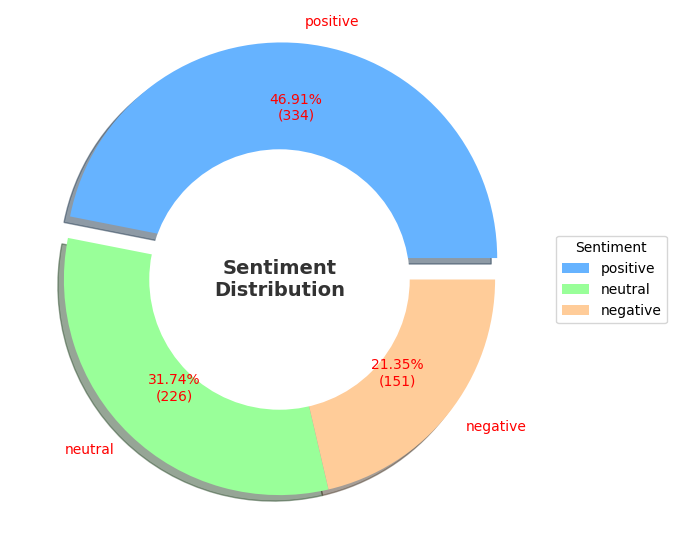

In [ ]:
import matplotlib.pyplot as plt

# Define colors and explode settings
colors = ['#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0, 0)

# Compute sentiment counts
sentiment_counts = df["Sentiment"].value_counts()

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Generate the pie chart
wedges, texts, autotexts = ax.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p * sum(sentiment_counts) / 100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

# Add a center circle to create a donut chart effect
center_circle = plt.Circle((0, 0), 0.6, color='white', linewidth=1.25)
ax.add_artist(center_circle)

# Add a central label
ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center',
        fontsize=14, fontweight='bold', color='#333333')

# Add a legend
ax.legend(sentiment_counts.index, title="Sentiment", loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure equal aspect ratio for a perfect circle
ax.set_aspect('equal')

# Show the plot
plt.show()


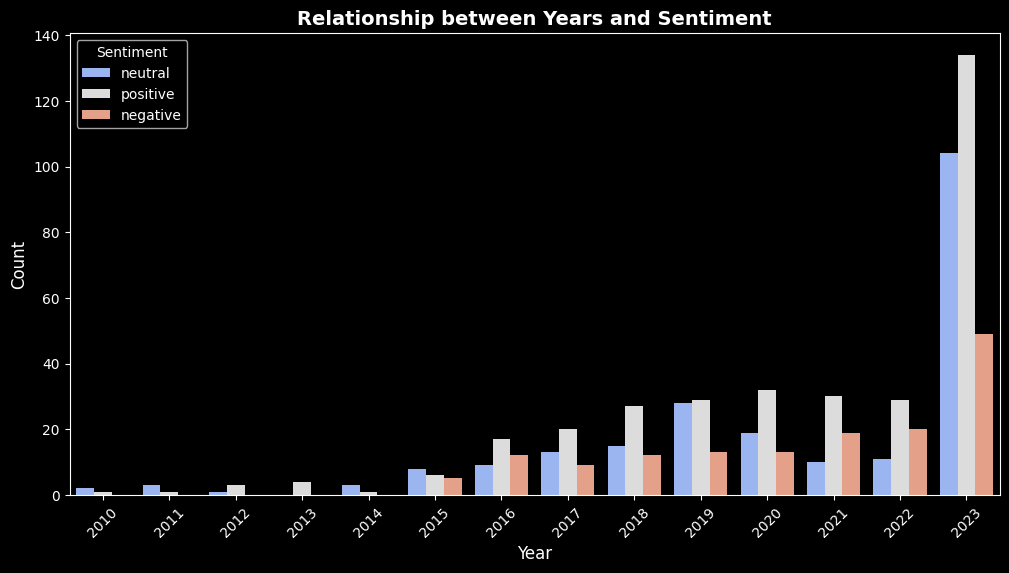

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark theme for better visibility
plt.style.use("dark_background")

# Define figure size
plt.figure(figsize=(12, 6))

# Create the count plot with a dark-themed palette
sns.countplot(x='Year', hue='Sentiment', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Relationship between Years and Sentiment', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Year', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, color='white')

# Adjust y-axis tick colors
plt.yticks(color='white')

# Show the plot
plt.show()


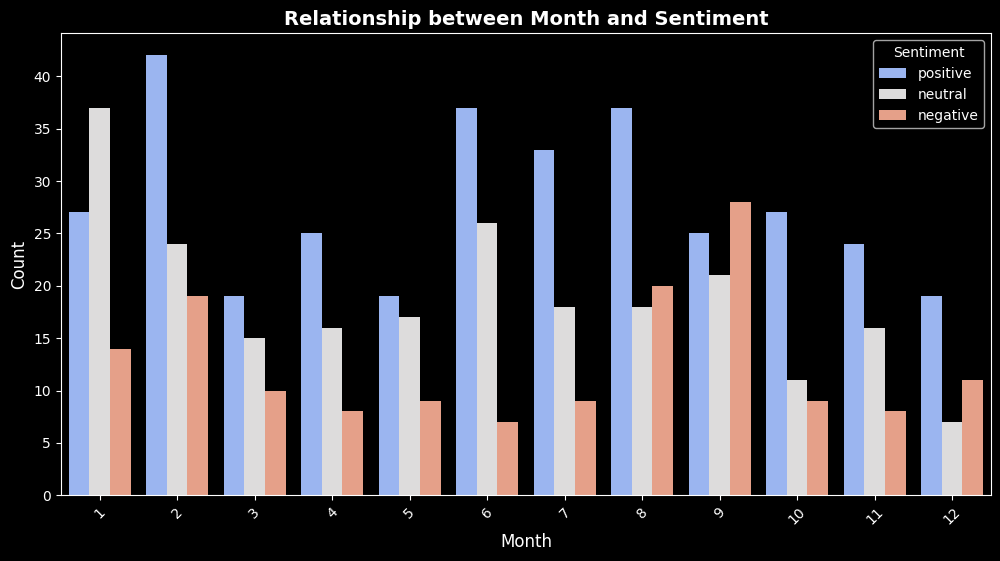

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark theme for better visibility
plt.style.use("dark_background")

# Define figure size
plt.figure(figsize=(12, 6))

# Create the count plot with a dark-themed palette
sns.countplot(x='Month', hue='Sentiment', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Relationship between Month and Sentiment', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Month', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, color='white')

# Adjust y-axis tick colors
plt.yticks(color='white')

# Show the plot
plt.show()


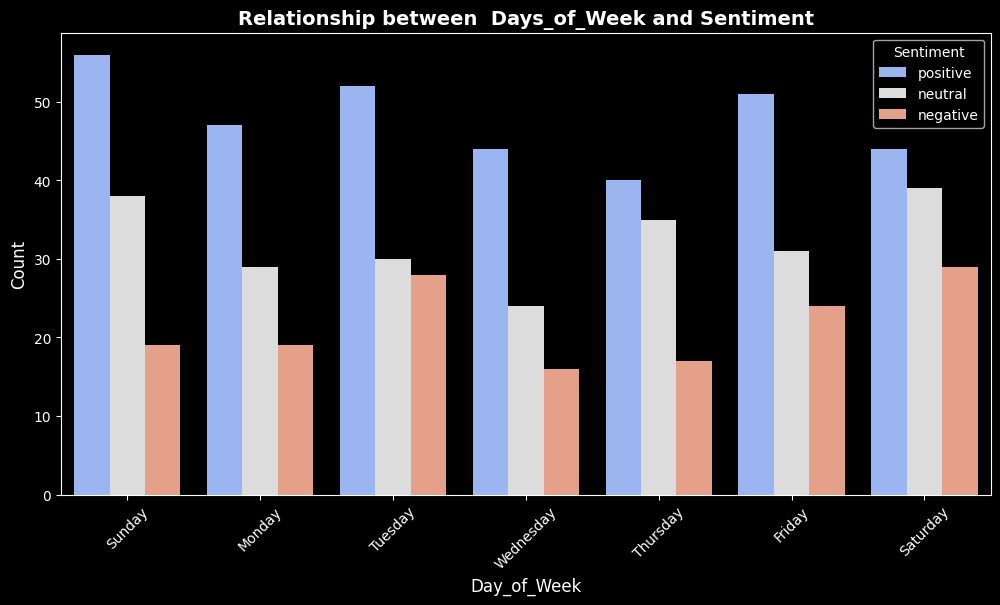

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark theme for better visibility
plt.style.use("dark_background")

# Define figure size
plt.figure(figsize=(12, 6))

# Create the count plot with a dark-themed palette
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Relationship between  Days_of_Week and Sentiment', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Day_of_Week', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, color='white')

# Adjust y-axis tick colors
plt.yticks(color='white')

# Show the plot
plt.show()


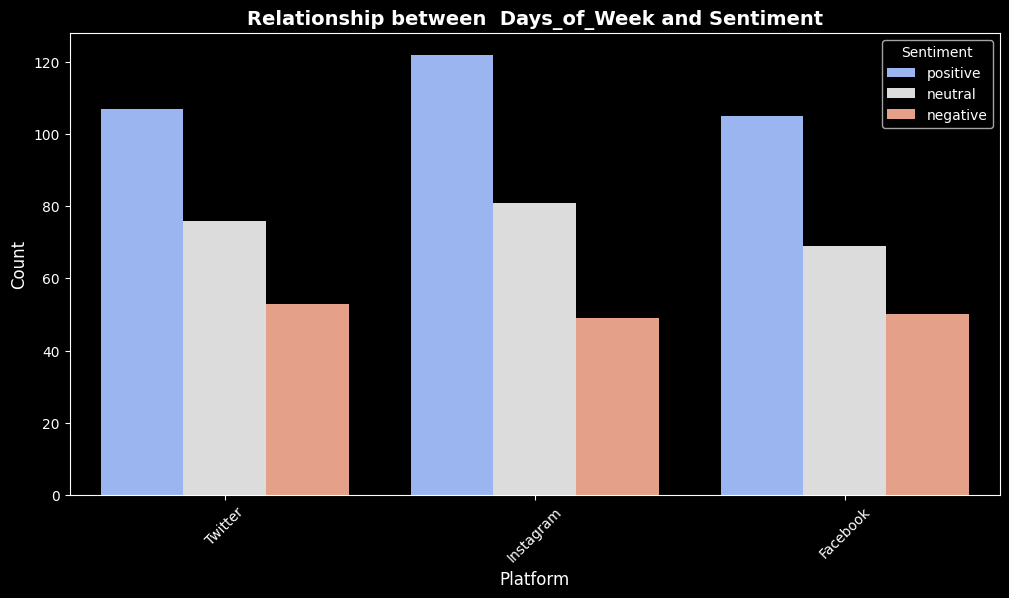

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a dark theme for better visibility
plt.style.use("dark_background")

# Define figure size
plt.figure(figsize=(12, 6))

# Create the count plot with a dark-themed palette
sns.countplot(x='Platform', hue='Sentiment', data=df, palette='coolwarm')

# Add titles and labels
plt.title('Relationship between  Days_of_Week and Sentiment', fontsize=14, fontweight='bold', color='white')
plt.xlabel('Platform', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, color='white')

# Adjust y-axis tick colors
plt.yticks(color='white')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from collections import Counter

# Tokenize text into word lists
df['temp_list'] = df['Clean_Text'].str.split()

# Flatten the list and count word occurrences
top_words = Counter(word for sublist in df['temp_list'] for word in sublist)

# Convert to DataFrame and get top 20 words
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_Words', 'Count'])

# Style the DataFrame with a gradient
top_words_df.style.background_gradient(cmap='pink')


,Common_Words,Count
0,new,43
1,life,34
2,challeng,31
3,joy,30
4,day,29
5,feel,29
6,danc,29
7,like,28
8,moment,27
9,emot,27


In [ ]:
import pandas as pd
import plotly.express as px
from collections import Counter

# Tokenize text into word lists
df['temp_list'] = df['Clean_Text'].str.split()

# Flatten the list and count word occurrences
top_words = Counter(word for sublist in df['temp_list'] for word in sublist)

# Convert to DataFrame and get top 20 words
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_Words', 'Count'])

# Create horizontal bar plot using Plotly with a dark theme
fig = px.bar(
    top_words_df,
    x="Count",
    y="Common_Words",
    title="Top 20 Common Words in Text Data",
    orientation="h",
    width=700,
    height=700,
    color="Common_Words",
    color_discrete_sequence=px.colors.sequential.Purples,  # Darker color palette
    template="plotly_dark"  # Apply dark theme
)

# Show plot
fig.show()


In [ ]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Load Dataset
df = pd.read_csv("cleaned_dataset.csv")

# Keep only necessary columns
df = df[['Text', 'Sentiment']]

# Text Cleaning Function
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    return text

# Apply Cleaning
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    df['Cleaned_Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Build Pipeline with TF-IDF and Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB())
])

# Train Model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Example Prediction
example_text = ["I love this product! It's amazing.", "This was the worst experience ever."]
predictions = pipeline.predict(example_text)
print(list(zip(example_text, predictions)))


Accuracy: 0.1049
                     precision    recall  f1-score   support

         acceptance       0.00      0.00      0.00         3
     accomplishment       0.00      0.00      0.00         1
         adrenaline       0.00      0.00      0.00         1
          affection       0.00      0.00      0.00         1
          amusement       0.00      0.00      0.00         1
              anger       0.00      0.00      0.00         1
            arousal       0.00      0.00      0.00         4
                awe       0.00      0.00      0.00         1
           betrayal       0.00      0.00      0.00         2
             bitter       0.00      0.00      0.00         1
            blessed       0.00      0.00      0.00         1
           calmness       0.00      0.00      0.00         1
      compassionate       0.00      0.00      0.00         1
          confusion       0.00      0.00      0.00         2
         connection       0.00      0.00      0.00         1
      

In [ ]:
df1=df
df1.head()

,Text,Sentiment,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,positive,enjoying a beautiful day at the park ...
1,Traffic was terrible this morning. ...,negative,traffic was terrible this morning ...
2,Just finished an amazing workout! 💪 ...,positive,just finished an amazing workout
3,Excited about the upcoming weekend getaway! ...,positive,excited about the upcoming weekend getaway ...
4,Trying out a new recipe for dinner tonight. ...,neutral,trying out a new recipe for dinner tonight ...


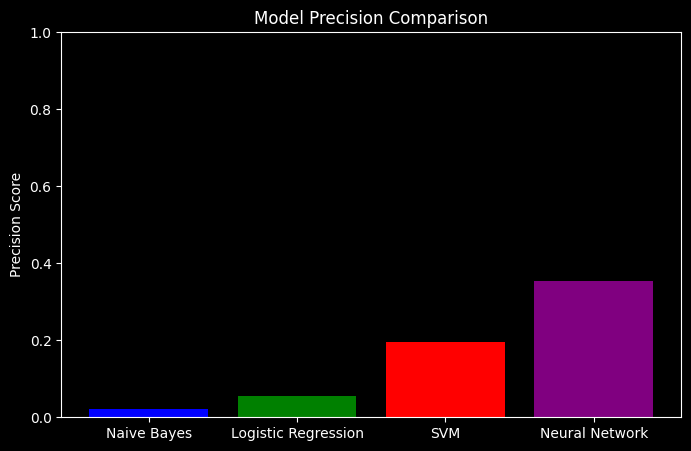

Naive Bayes: 0.0221
Logistic Regression: 0.0553
SVM: 0.1957
Neural Network: 0.3542


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Load dataset



# Extract features and labels
X = df1["Text"]
y = df1["Sentiment"]

# Convert text to numerical features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

# Train and evaluate models
precision_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    precision_scores[name] = precision

# Plot results
plt.figure(figsize=(8, 5))
plt.bar(precision_scores.keys(), precision_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Precision Score')
plt.title('Model Precision Comparison')
plt.ylim(0, 1)
plt.show()

# Print precision scores
for model, score in precision_scores.items():
    print(f"{model}: {score:.4f}")



Naive Bayes:
Accuracy: 0.0979
Classification Report:
                      precision    recall  f1-score   support

         acceptance       0.00      0.00      0.00         3
     accomplishment       0.00      0.00      0.00         1
         adrenaline       0.00      0.00      0.00         1
          affection       0.00      0.00      0.00         1
          amusement       0.00      0.00      0.00         1
              anger       0.00      0.00      0.00         1
            arousal       0.00      0.00      0.00         4
                awe       0.00      0.00      0.00         1
           betrayal       0.00      0.00      0.00         2
             bitter       0.00      0.00      0.00         1
            blessed       0.00      0.00      0.00         1
           calmness       0.00      0.00      0.00         1
      compassionate       0.00      0.00      0.00         1
          confusion       0.00      0.00      0.00         2
         connection       0.0

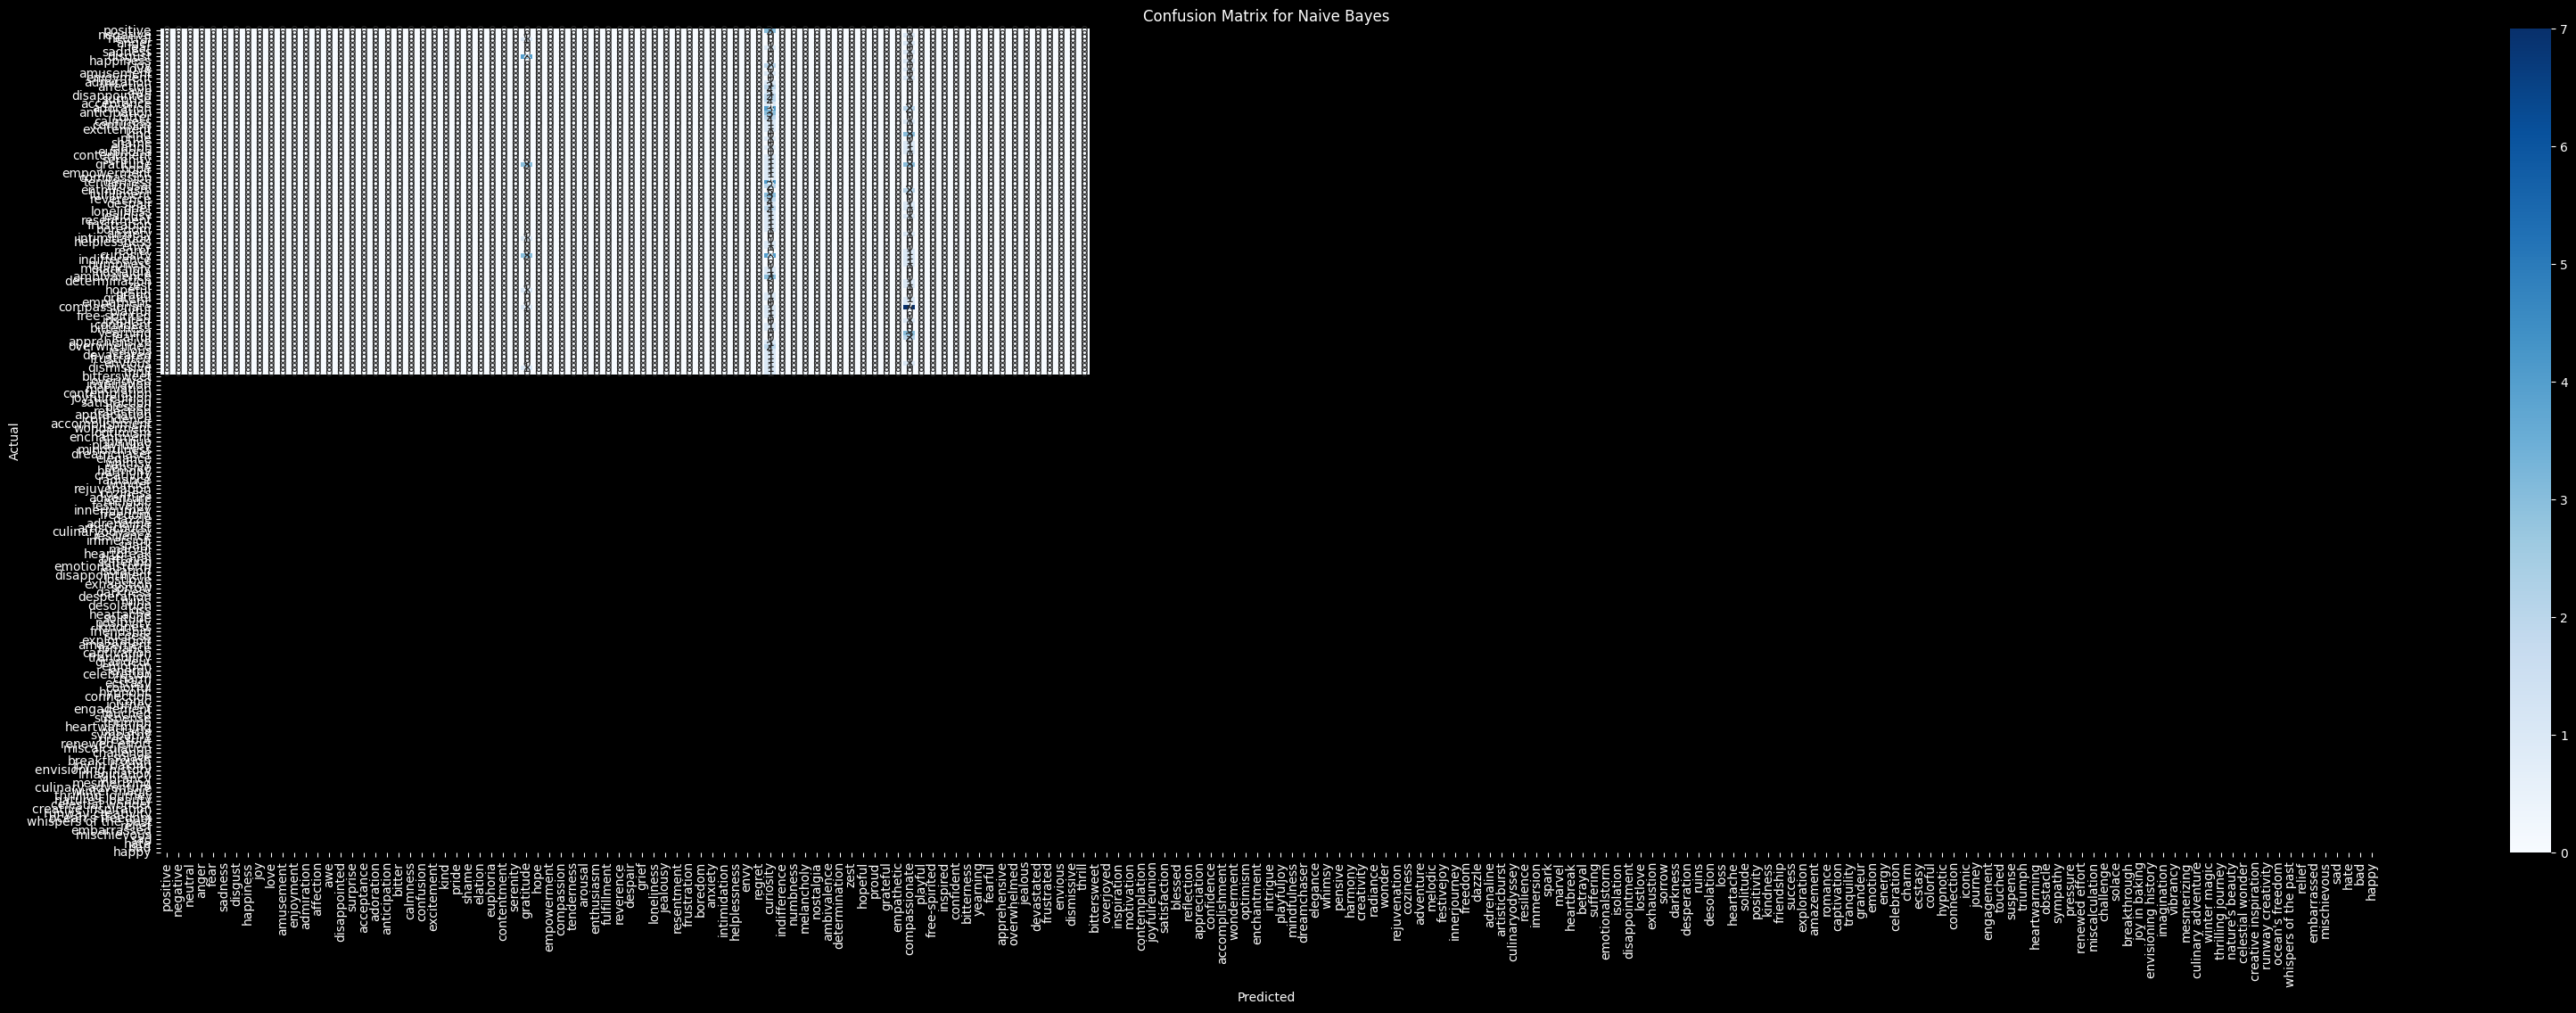


Logistic Regression:
Accuracy: 0.1189
Classification Report:
                      precision    recall  f1-score   support

         acceptance       0.00      0.00      0.00         3
     accomplishment       0.00      0.00      0.00         1
         adrenaline       0.00      0.00      0.00         1
          affection       0.00      0.00      0.00         1
          amusement       0.00      0.00      0.00         1
              anger       0.00      0.00      0.00         1
            arousal       0.00      0.00      0.00         4
                awe       0.00      0.00      0.00         1
           betrayal       0.00      0.00      0.00         2
             bitter       0.00      0.00      0.00         1
            blessed       0.00      0.00      0.00         1
           calmness       0.00      0.00      0.00         1
      compassionate       0.00      0.00      0.00         1
          confusion       0.00      0.00      0.00         2
         connection  

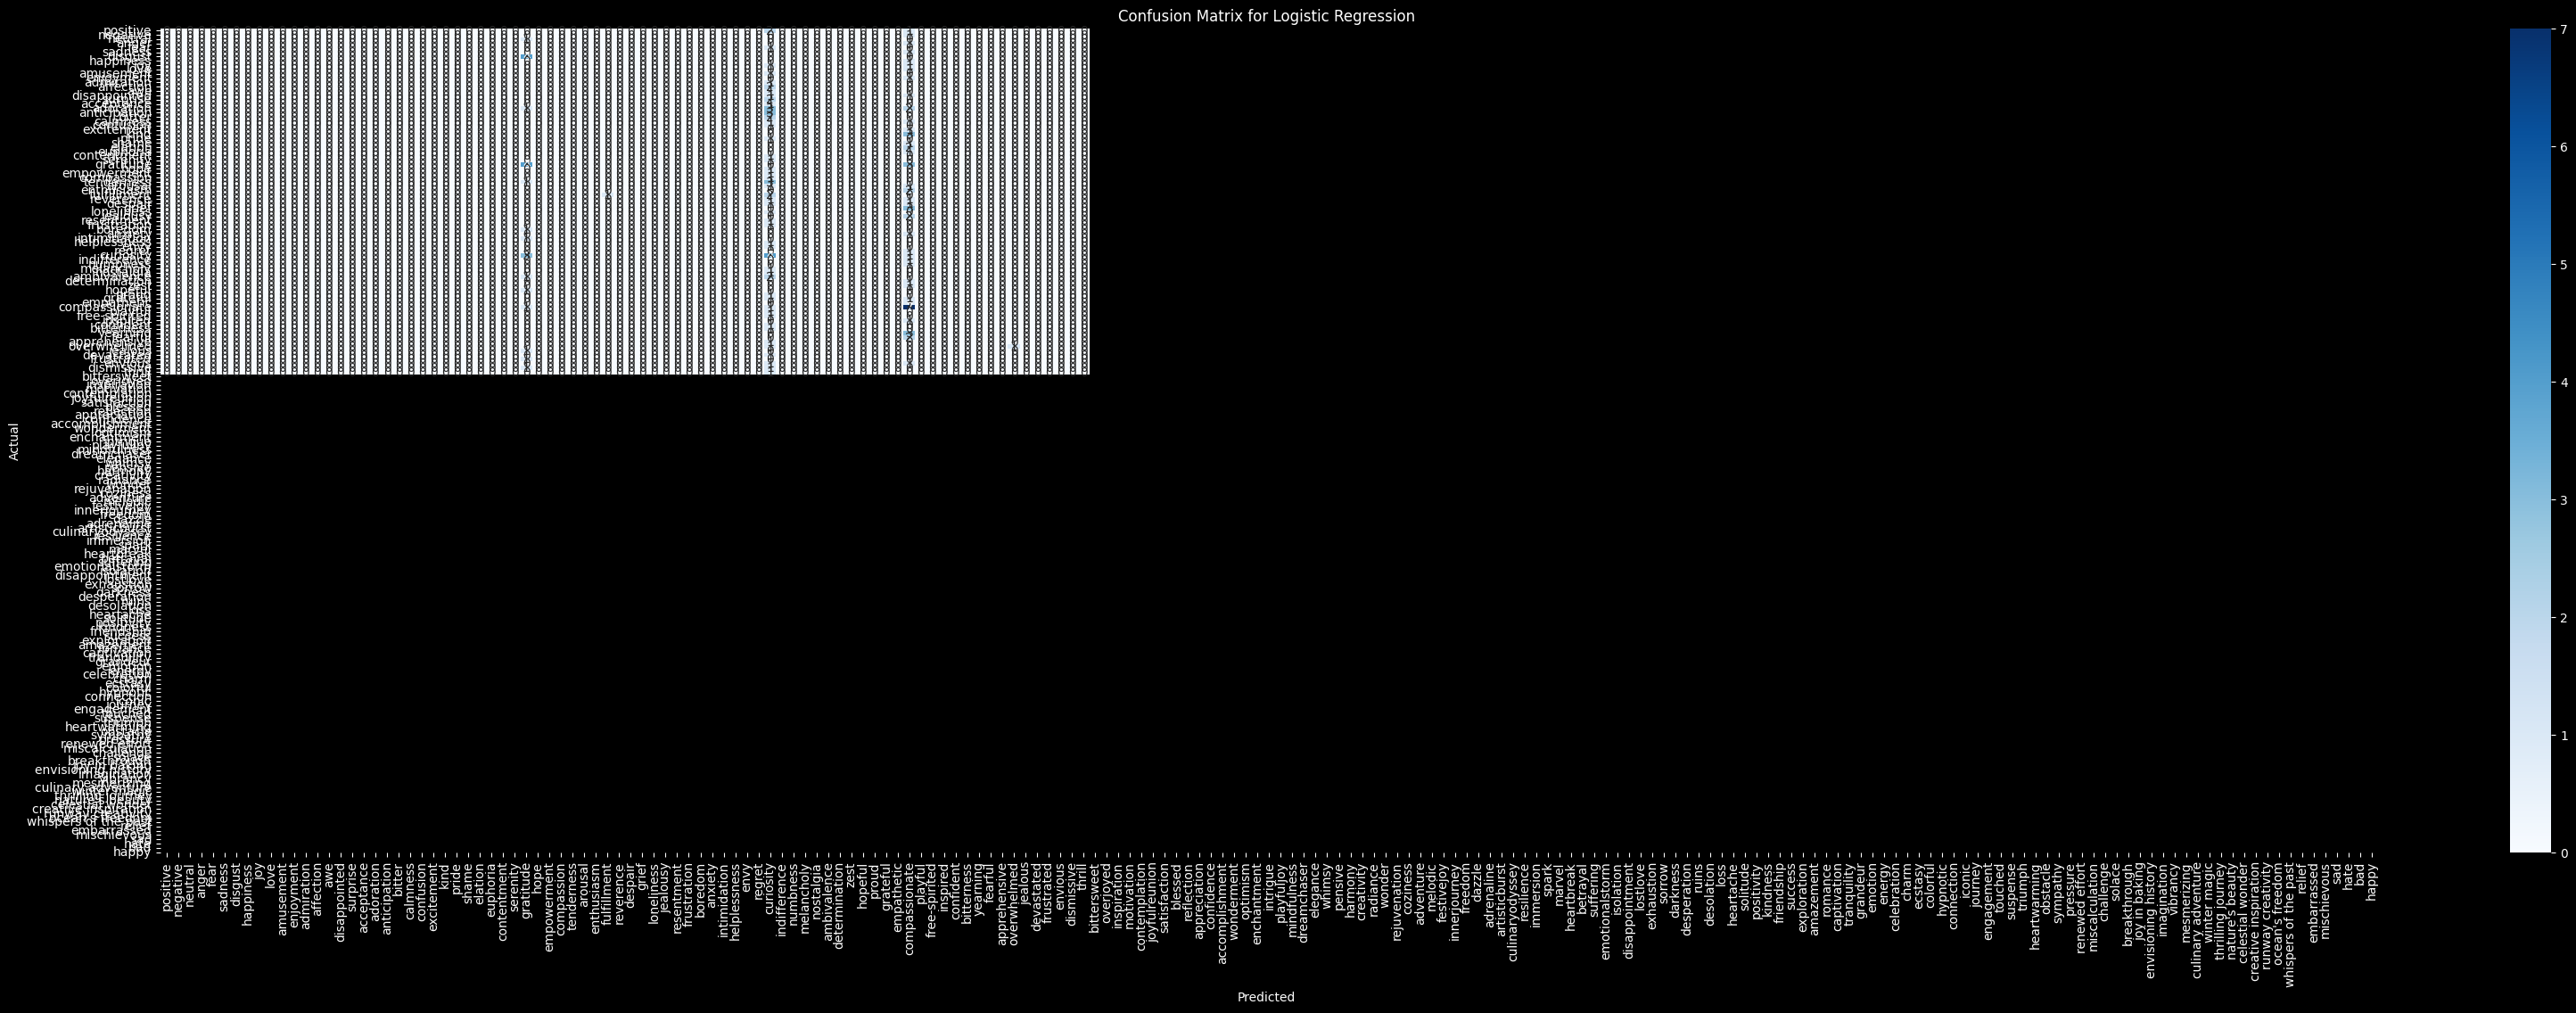


SVM:
Accuracy: 0.2308
Classification Report:
                      precision    recall  f1-score   support

         acceptance       1.00      1.00      1.00         3
     accomplishment       0.00      0.00      0.00         1
         adrenaline       0.00      0.00      0.00         1
          affection       0.00      0.00      0.00         1
          amusement       0.00      0.00      0.00         1
              anger       0.00      0.00      0.00         1
            arousal       0.00      0.00      0.00         4
                awe       1.00      1.00      1.00         1
           betrayal       0.00      0.00      0.00         2
             bitter       0.00      0.00      0.00         1
            blessed       0.00      0.00      0.00         1
           calmness       0.00      0.00      0.00         1
      compassionate       1.00      1.00      1.00         1
          confusion       1.00      1.00      1.00         2
         connection       0.00      0

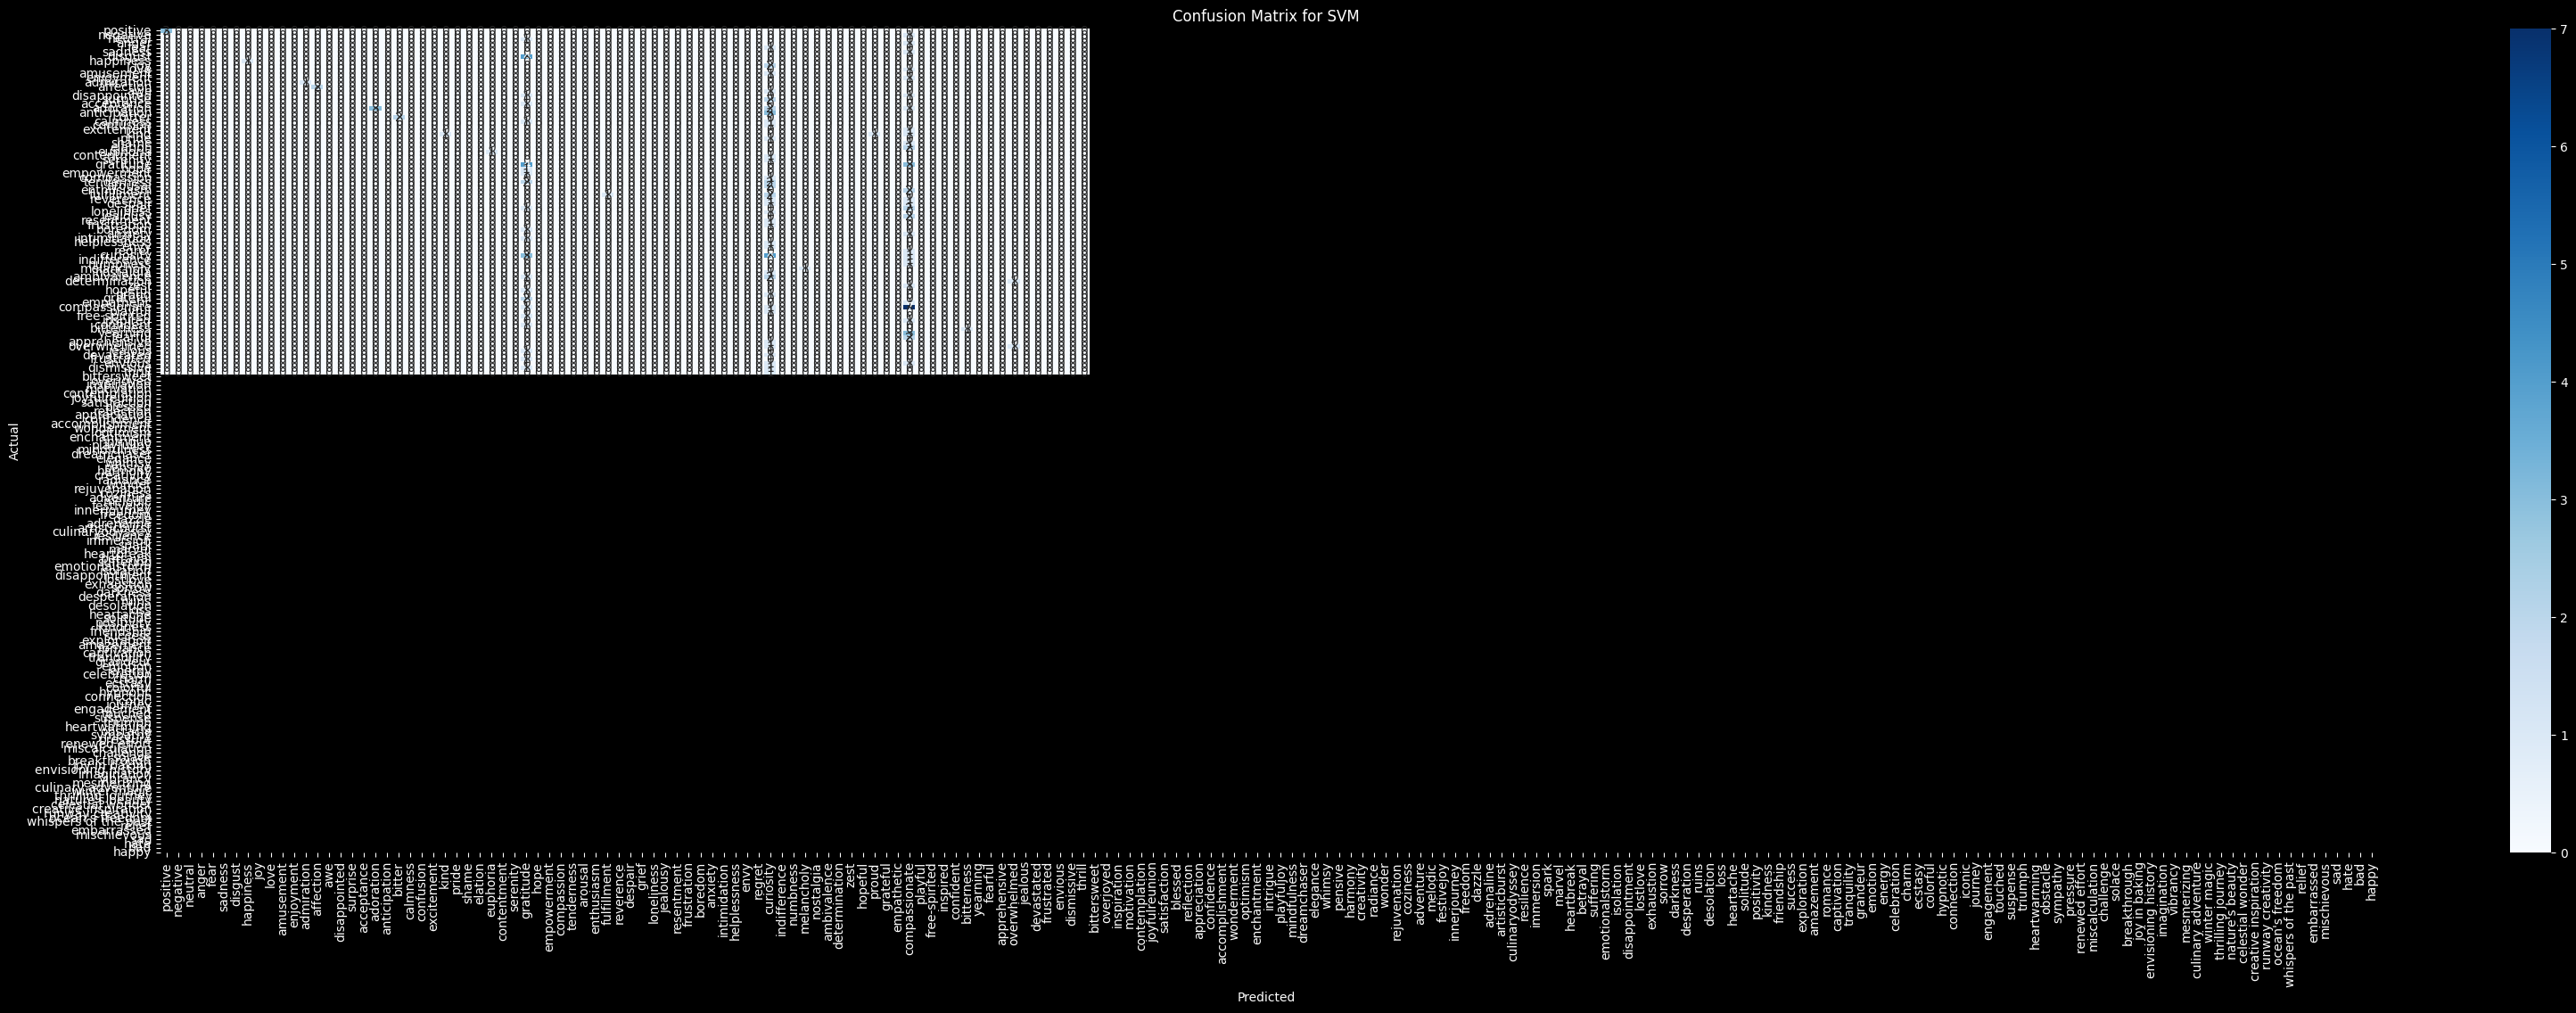


Neural Network:
Accuracy: 0.3147
Classification Report:
                      precision    recall  f1-score   support

         acceptance       1.00      1.00      1.00         3
     accomplishment       0.00      0.00      0.00         1
         adrenaline       0.00      0.00      0.00         1
          affection       1.00      1.00      1.00         1
          amusement       1.00      1.00      1.00         1
              anger       0.00      0.00      0.00         1
            arousal       0.00      0.00      0.00         4
      artisticburst       0.00      0.00      0.00         0
                awe       1.00      1.00      1.00         1
           betrayal       0.00      0.00      0.00         2
             bitter       1.00      1.00      1.00         1
        bittersweet       0.00      0.00      0.00         0
            blessed       0.00      0.00      0.00         1
           calmness       1.00      1.00      1.00         1
      compassionate       

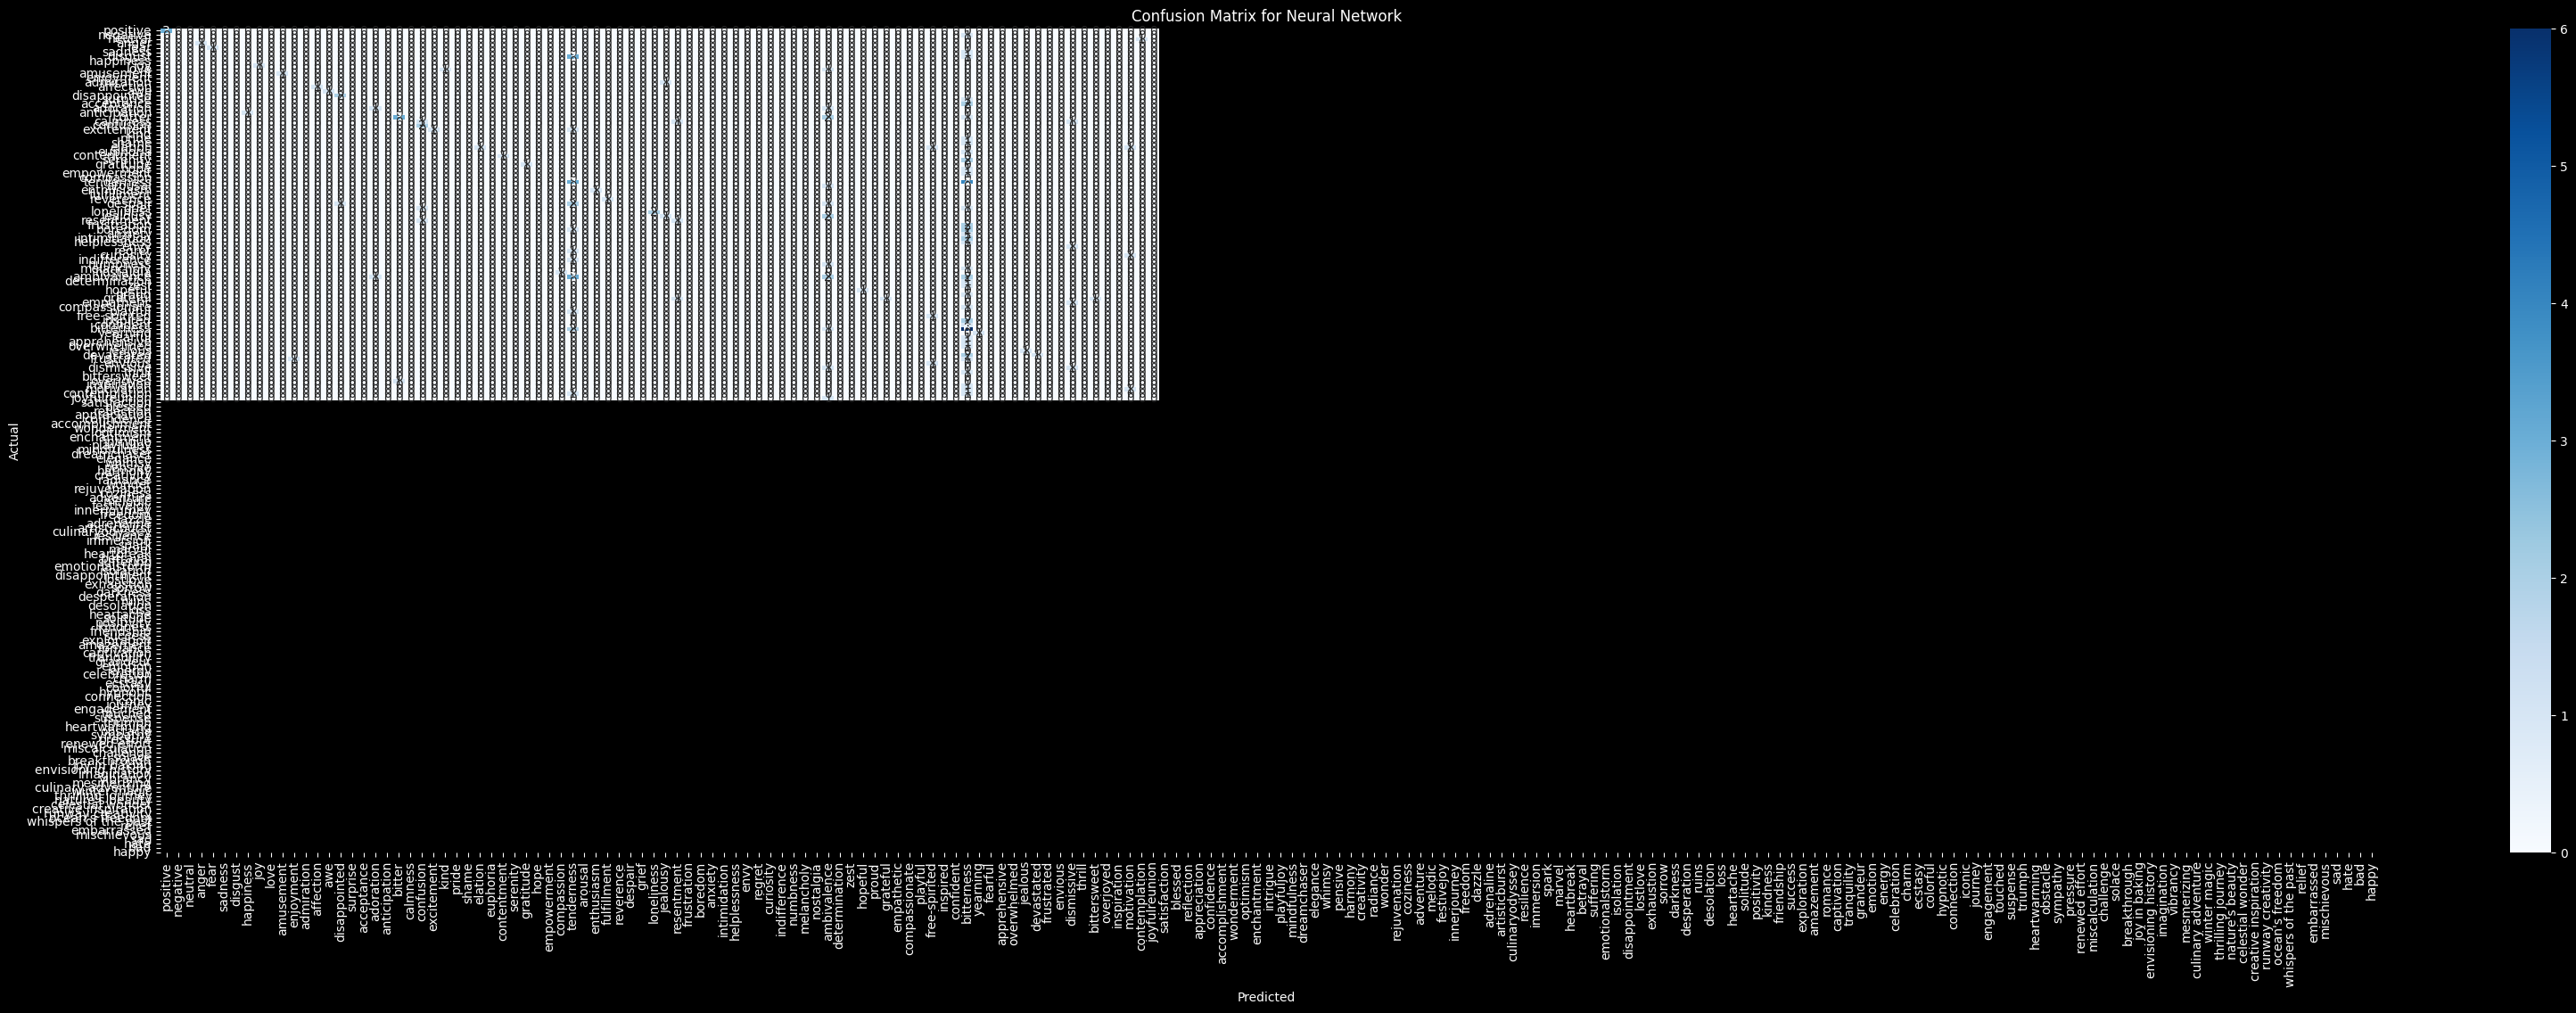

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset


# Extract features and labels
X = df1["Text"]
y = df1["Sentiment"]

# Convert text to numerical features
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='linear', probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    results[name] = {"accuracy": accuracy, "report": report, "confusion_matrix": confusion}

# Display results
for model, result in results.items():
    print(f"\n{model}:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:\n", result['report'])
    plt.figure(figsize=(40, 12))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=df["Sentiment"].unique(), yticklabels=df["Sentiment"].unique())
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model}')
    plt.show()
